In [1]:
# Import libraries and load datasets
import pandas as pd
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import dmpy as npmpy as npimport nu
import matplotlib.pypl
from matplotlib import colorsot as plt
import seabornmpy as np

df1 = pd.read_csv('../data/datatest.csv').drop(['sn','date'],axis=1)
df2 = pd.read_csv('../data/datatest2.csv').drop(['sn','date'],axis=1)
df_train = pd.read_csv('../data/datatraining.csv').drop(['sn','date'],axis=1)
df_test = df1.append(df2)

In [2]:
# Create train and test dataframes for supervised learning algorithms
x_train = df_train.iloc[:,0:5]
x_test = df_test.iloc[:,0:5]
y_train = df_train['Occupancy']
y_test = df_test['Occupancy']

In [3]:
# SVM
begin_time = datetime.datetime.now()

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

completion_time = datetime.datetime.now() - begin_time

In [4]:
# Logistic Regression
begin_time = datetime.datetime.now()

clf = LogisticRegression(solver='lbfgs')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

completion_time = datetime.datetime.now() - begin_time

In [5]:
# Naive Bayes
begin_time = datetime.datetime.now()

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

completion_time = datetime.datetime.now() - begin_time

In [6]:
# Decision Tree
begin_time = datetime.datetime.now()

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

completion_time = datetime.datetime.now() - begin_time

In [7]:
# Prepare data for k-means clustering
df_total = df_train.append(df_test)x = np.array(df_total[['Light', 'Temperature']])
y = np.array(df_total['Occupancy'])
x.shape']

(20560, 2)

In [8]:
# K-means clustering with hardcoded centroids, calculated from previous executions to achieve optimal result
kmeans = KMeans(n_clusters=2, n_init=1, init=np.array([[10.33503514, 20.50117836], [466.37994764, 22.03506988]]))
kmeans.fit(x)
# Predicted values
y_kmeans = kmeans.predict(x)


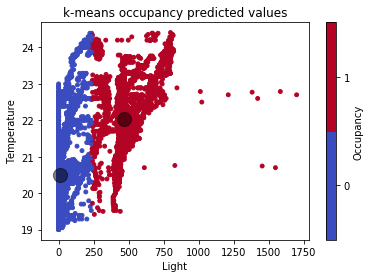

In [9]:
# Create plot with predicted values
# Create custom colormap with 2 colors
base = plt.cm.get_cmap('coolwarm')
color_list = base(np.linspace(0, 1, 2))
custom_cmap = plt.cm.colors.ListedColormap(color_list, color_list, 2)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=15, cmap=custom_cmap)
plt.xlabel('Light')
plt.ylabel('Temperature')
cbar = plt.colorbar(label='Occupancy',ticks=np.linspace(0.25, 0.75, 2))
cbar.set_ticklabels([0,1])
plt.title('k-means occupancy predicted values');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

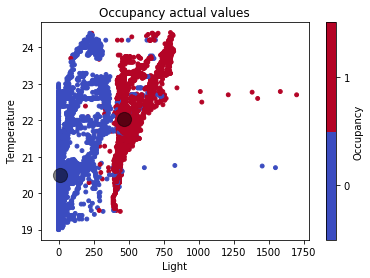

In [10]:
# Create plot with actual values
plt.scatter(x[:, 0], x[:, 1], c=y, s=15, cmap=custom_cmap)
plt.xlabel('Light')
plt.ylabel('Temperature')
cbar = plt.colorbar(label='Occupancy',ticks=np.linspace(0.25, 0.75, 2))
cbar.set_ticklabels([0,1])
plt.title('Occupancy actual values');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [11]:
# Find similarity in k_means_array and actual array of occupancy
correct = 0
for i in range(len(y)):
    if y[i] == y_kmeans[i]:
       correct = correct + 1

print('Total elements: ' + str(len(y)))
print('Correct predictions: ' + str(correct))
print('Wrong predictions: ' + str((len(y_kmeans) - correct)))
print('Accuracy ' + '{0:.2%}'.format(correct/len(y)))

Total elements: 20560
Correct predictions: 19863
Wrong predictions: 697
Accuracy 96.61%
